In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import Timestamp
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

In [2]:
uri1='https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_BiLSTM_minimum.csv'
uri2='https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_BiLSTM_rising.csv'
uri3='https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_GRU_minimum.csv'
uri4='https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_GRU_rising.csv'

df1=pd.read_csv(uri1)
df1 = df1.drop(columns=['Unnamed: 0'])
df1.Date = pd.to_datetime(df1.Date)
df1.set_index('Date', inplace=True)

df2=pd.read_csv(uri2)
df2 = df2.drop(columns=['Unnamed: 0'])
df2.Date = pd.to_datetime(df2.Date)
df2.set_index('Date', inplace=True)

df3=pd.read_csv(uri3)
df3 = df3.drop(columns=['Unnamed: 0'])
df3.Date = pd.to_datetime(df3.Date)
df3.set_index('Date', inplace=True)

df4=pd.read_csv(uri4)
df4 = df4.drop(columns=['Unnamed: 0'])
df4.Date = pd.to_datetime(df4.Date)
df4.set_index('Date', inplace=True)

df1.head()

,Density_Norm,Density_syn
Date,,
2018-05-29 12:00:00,0.008848,0.049446
2018-05-29 13:00:00,0.020437,0.139816
2018-05-29 14:00:00,0.028079,0.131321
2018-05-29 15:00:00,0.011691,0.045392
2018-05-29 16:00:00,0.053540,0.210820


In [3]:
rho_max_minimumPhase = 3.71563645964834E-13
rho_max_risingPhase = 1.71652203e-12

In [4]:
a1 = df1['Density_Norm'].to_numpy()
a1 = a1.reshape(-1)
a1 = a1/a1.max()
a1 = a1*rho_max_minimumPhase

a2 = df2['Density_Norm'].to_numpy()
a2 = a2.reshape(-1)
a2 = a2/a2.max()
a2 = a2*rho_max_risingPhase

a3 = df3['Density_Norm'].to_numpy()
a3 = a3.reshape(-1)
#a3 = a3/a3.max()
a3 = a3*rho_max_risingPhase

a4 = df4['Density_Norm'].to_numpy()
a4 = a4.reshape(-1)
a4 = a4/a4.max()
a4 = a4*rho_max_risingPhase

a4.shape

(19812,)

In [5]:
b1 = df1['Density_syn'].to_numpy()
b1 = b1.reshape(-1)
b1 = b1*rho_max_minimumPhase

b2 = df2['Density_syn'].to_numpy()
b2 = b2.reshape(-1)
b2 = b2*rho_max_risingPhase

b3 = df3['Density_syn'].to_numpy()
b3 = b3.reshape(-1)
b3 = b3*rho_max_risingPhase

b4 = df4['Density_syn'].to_numpy()
b4 = b4.reshape(-1)
b4 = b4*rho_max_risingPhase

b1.shape

(20052,)

In [6]:
print(a1.max(),a2.max(),a3.max(),a4.max())
print(b1.max(),b2.max(),b3.max(),b4.max())

3.71563645964834e-13 1.71652203e-12 3.6998397847453483e-13 1.71652203e-12
3.6205421757365604e-13 1.7944593395545258e-12 3.5354951923171595e-13 1.635295864235994e-12


In [7]:
coef1 = np.polyfit(a1,b1,1)
poly1d_fn1 = np.poly1d(coef1)

coef2 = np.polyfit(a2,b2,1)
poly1d_fn2 = np.poly1d(coef2)

coef3 = np.polyfit(a3,b3,1)
poly1d_fn3 = np.poly1d(coef3)

coef4 = np.polyfit(a4,b4,1)
poly1d_fn4 = np.poly1d(coef4)

print(coef1[0],coef2[0],coef2[0],coef2[0])

0.9492990215909076 0.9667806193806514 0.9667806193806514 0.9667806193806514


In [8]:
left, width = 0, 1.15
bottom, height = 0, 1.2
right = left + width
top = bottom + height

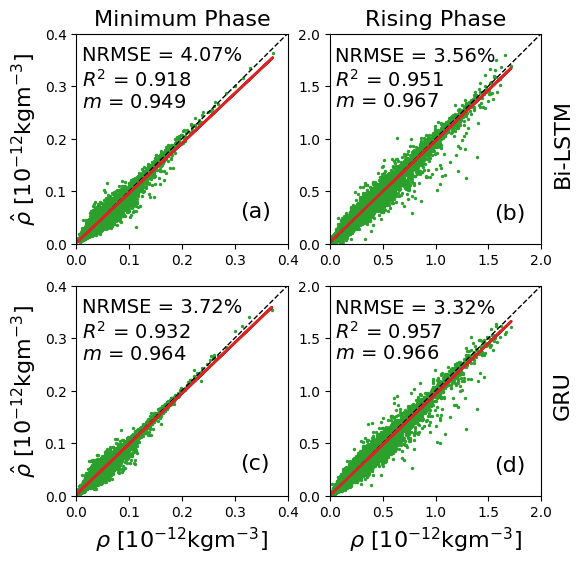

In [9]:
fig, ((ax_a, ax_b), (ax_c, ax_d)) = plt.subplots(2, 2, figsize=(6, 6))
#############################################
ax_a.scatter(a1*1e12, b1*1e12, s = 2, color = 'tab:green')
ax_a.axline((1, 1), slope=1, linestyle  = '--', linewidth = '1', color = 'black')
ax_a.plot(a1*1e12, poly1d_fn1(a1)*1e12, linewidth = '2', color = 'tab:red')
ax_a.set_ylim(0,.4)
ax_a.set_xlim(0,.4)
ax_a.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_a.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_a.set_ylabel(r'$\hat{\rho}$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=16)
ax_a.set_title('Minimum Phase', size=16, loc='center')

ax_a.text(0.01, 0.35, 'NRMSE = 4.07%', size=14)
ax_a.text(0.01, 0.30, '$R^2$ = 0.918', size=14)
ax_a.text(0.01, 0.26, '$m$ = 0.949', size=14)
ax_a.text(0.31, 0.05, '(a)', size=16)
#############################################
ax_b.scatter(a2*1e12, b2*1e12, s = 2, color = 'tab:green')
ax_b.axline((1, 1), slope=1, linestyle  = '--', linewidth = '1', color = 'black')
ax_b.plot(a2*1e12, poly1d_fn2(a2)*1e12, linewidth = '2', color = 'tab:red')
ax_b.set_ylim(0,2.0)
ax_b.set_xlim(0,2.0)
ax_b.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_b.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_b.set_title('Rising Phase', size=16, loc='center')
ax_b.text(right, 0.4 * (bottom + top), 'Bi-LSTM',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax_b.transAxes, size=16)

ax_b.text(0.05, 1.74, 'NRMSE = 3.56%', size=14)
ax_b.text(0.05, 1.50, '$R^2$ = 0.951', size=14)
ax_b.text(0.05, 1.31, '$m$ = 0.967', size=14)
ax_b.text(1.55, 0.23, '(b)', size=16)
#############################################
ax_c.scatter(a3*1e12, b3*1e12, s = 2, color = 'tab:green')
ax_c.axline((1, 1), slope=1, linestyle  = '--', linewidth = '1', color = 'black')
ax_c.plot(a3*1e12, poly1d_fn3(a3)*1e12, linewidth = '2', color = 'tab:red')
ax_c.set_ylim(0,.4)
ax_c.set_xlim(0,.4)
ax_c.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_c.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_c.set_ylabel(r'$\hat{\rho}$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=16)
ax_c.set_xlabel(r'$\rho$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=16)

ax_c.text(0.01, 0.35, 'NRMSE = 3.72%', size=14)
ax_c.text(0.01, 0.30, '$R^2$ = 0.932', size=14)
ax_c.text(0.01, 0.26, '$m$ = 0.964', size=14)
ax_c.text(0.31, 0.05, '(c)', size=16)
#############################################
ax_d.scatter(a4*1e12, b4*1e12, s = 2, color = 'tab:green')
ax_d.axline((1, 1), slope=1, linestyle  = '--', linewidth = '1', color = 'black')
ax_d.plot(a4*1e12, poly1d_fn4(a4)*1e12, linewidth = '2', color = 'tab:red')
ax_d.set_ylim(0,2.0)
ax_d.set_xlim(0,2.0)
ax_d.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax_d.set_xlabel(r'$\rho$' " [$\mathregular{10^{-12} kgm^{-3}}$]", size=16)
ax_d.text(right, 0.4 * (bottom + top), 'GRU',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax_d.transAxes, size=16)

ax_d.text(0.05, 1.74, 'NRMSE = 3.32%', size=14)
ax_d.text(0.05, 1.50, '$R^2$ = 0.957', size=14)
ax_d.text(0.05, 1.31, '$m$ = 0.966', size=14)
ax_d.text(1.55, 0.23, '(d)', size=16)
plt.show()